<a href="https://colab.research.google.com/github/Gustavo79-dev/Analise_dados_airbnb_RJ/blob/master/An%C3%A1lise_do_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados do Airbnb da cidade do Rio de Janeiro**





Airbnb maior empresa hoteleira da atualidade não possui hotel, conectando pessoas que querem viajar, alugando imóveis ou quartos de maneira pratica, o Airbnb oferece uma forma inovadora para uma hospedagem alternativa.



# **Apresentando os Dados**

> Os dados analisados foram obtidos a apartir do site "[insideAirbnb](https://http://insideairbnb.com/)".
Com base nas informações deste Dataset realizei alguns insights para responder algumas perguntas acerca de localização, preço, tipo de imóvel, reviewse etc...

# **Perguntas a serem respondidas**

> Qual o tipo de imóvel?


> Onde o imóvel esta localizado, qual tipo de bairro?


> Qauntas indicações o imóvel recebeu?









# **Data Cleaning e Data Wrangling**

>Limpeza e organização dos Dados



In [ ]:
# Importar pacotesnecessarios
import pandas as pd
! pip install -q matplotlib-venn
import seaborn as sns
sns.set_style()
import matplotlib.pyplot as plt
%matplotlib inline 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importar o arquivo listings.csv para um Data frame
# Url = http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-09-23/visualisations/listings.csv
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-09-23/visualisations/listings.csv')


# **Análise dos Dados**


> Nesta fase identificamos as cinco primeiras linhas do Dadaset, verificar as variaveis no Data frame e criar um dicionário de variaveis.



In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## **Dicionário de variáveis.**
*   id - número de id gerado para identificar o imóvel
*   name - nome da propriedade anunciado
*   host_id - número de id do proprietário (anfitrião) da propriedade
*   host_name - Nome do anfitrião
*   neighbourhood_group - esta coluna não contém nenhum valor válido
*   neighbourhood - nome do bairro
*   latitude - coordenada da latitude da propriedade
*   longitude - coordenada da longitude da propriedade
*   room_type - informa o tipo de quarto que é oferecido
*   price - preço para alugar o imóvel
*   minimum_nights - quantidade mínima de noites para reservar
*   number_of_reviews - número de reviews que a propriedade possui
*   last_review - data do último review
*   reviews_per_month - quantidade de reviews por mês
*   calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
*   availability_365 - número de dias de disponibilidade dentro de 365 dias

In [ ]:
#5 Primeiras linhas
print('Este Dataset possui %s linhas e %s colunas' % (df.shape[0], df.shape[1]))
df.head(5)

Este Dataset possui 34329 linhas e 16 colunas


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,329,4,238,2019-08-24,2.13,1,312
1,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,233,2019-08-03,2.06,3,114
2,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,270,2,264,2019-08-10,2.36,1,137
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,374,2,162,2019-09-09,2.25,1,73
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,129,3,309,2019-09-15,2.83,1,118




**Identificando os bairros(neighbourhoods), deste Dataframe.**


In [ ]:
df['neighbourhood'].unique()

array(['Copacabana', 'Ipanema', 'Barra da Tijuca', 'Flamengo', 'Leblon',
       'Itanhangá', 'Santa Teresa', 'Centro', 'Gávea', 'Campo Grande',
       'Laranjeiras', 'Humaitá', 'Botafogo', 'Recreio dos Bandeirantes',
       'Santo Cristo', 'Glória', 'São Conrado', 'São Cristóvão',
       'Praça Seca', 'Maracanã', 'Tijuca', 'Lagoa',
       'São Francisco Xavier', 'Catete', 'Praia da Bandeira', 'Cacuia',
       'Jacarepaguá', 'Vidigal', 'Marechal Hermes', 'Jardim Botânico',
       'Catumbi', 'Rio Comprido', 'Senador Camará', 'Irajá',
       'Vargem Grande', 'Leme', 'Vila da Penha', 'Anil', 'Vargem Pequena',
       'Estácio', 'Grajaú', 'Cosme Velho', 'Camorim', 'Gardênia Azul',
       'Taquara', 'Bangu', 'Joá', 'Alto da Boa Vista', 'Urca',
       'Guaratiba', 'Penha Circular', 'Jardim Sulacap',
       'Praça da Bandeira', 'Encantado', 'Vila Isabel',
       'Lins de Vasconcelos', 'Cosmos', 'Santíssimo', 'Gamboa',
       'Bonsucesso', 'Piedade', 'Olaria', 'Vila Valqueire',
       'Cidade de

# Variáveis
Identificando as variáveis e a quantidade de entrada em nosso conjunto.

In [ ]:
print('Entradas:\t {}'.format(df.shape [0]))
print('Variáveis:\t {}'.format(df.shape [1]))
display (df.dtypes)

Entradas:	 34329
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**Porcentagem de valores ausentes**
Podemos identificar valores nulos e ausentes, que interfere na qualidadae do Dataset.
*   A coluna neighbourhood_group esta com 100% dos seus valores ausente;
*   A coluna reviews_per_month e last_review esta com aproximadadmente 40% dos seus valores faltando;
*   A coluna name e host_name tem 1% dos seus valores nulos.

In [ ]:
# Valores ausentes das variáveis
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


neighbourhood_group               1.000000
reviews_per_month                 0.467360
last_review                       0.467360
name                              0.001864
host_name                         0.000408
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

# **Distribuição das variáveis**

> Histograma para visualizar a distruibuição das variáveis e a presença de outliers nos Dados.


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

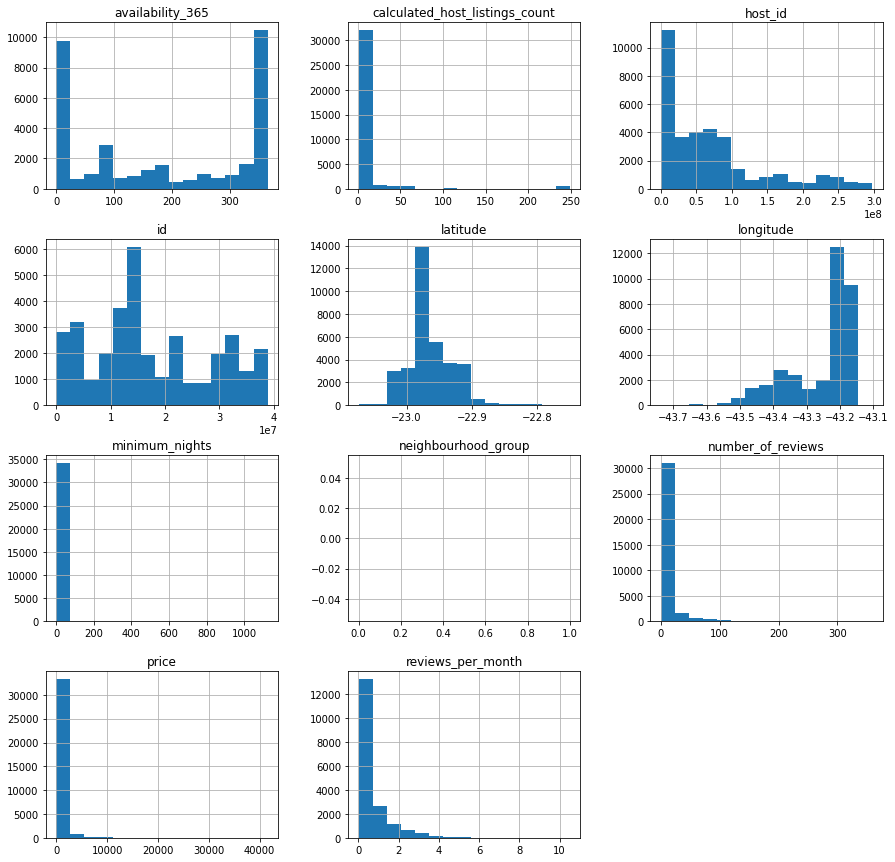

In [ ]:
df.hist(bins=15, figsize=(15, 15));

# Outliers

> Visualizando a distribuição das variáveis no histograma podemos identificar a presença de outliers nas variáveis calculated_host_listings_counts, minimun_nights, neighbourhood_group e price.

> É possivel confirmar a presença de outliers de naneira bem rapida analisando o resumo estatistico e plotando o boxplot para as variáveis.






In [ ]:
df[['calculated_host_listings_count', 'minimum_nights', 'neighbourhood_group', 'price', 'availability_365']].describe()

,calculated_host_listings_count,minimum_nights,neighbourhood_group,price,availability_365
count,34329.000000,34329.000000,0.0,34329.000000,34329.000000
mean,7.646858,4.794489,NaN,647.950683,182.437793
std,29.889300,22.706679,NaN,1694.920776,150.392649
min,1.000000,1.000000,NaN,0.000000,0.000000
25%,1.000000,1.000000,NaN,150.000000,0.000000
50%,1.000000,2.000000,NaN,290.000000,172.000000
75%,3.000000,4.000000,NaN,601.000000,354.000000
max,249.000000,1123.000000,NaN,41592.000000,365.000000


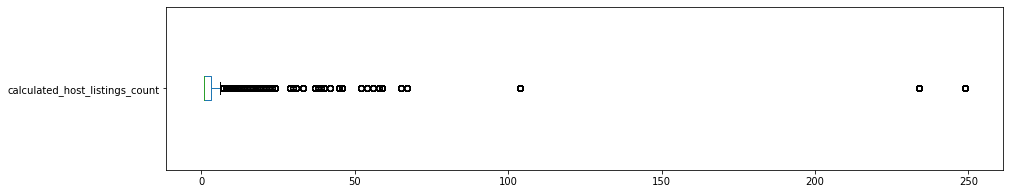


calculated_host_listings_count: valores acima de 4 imóveis:
5514entradas
16.0622%


In [ ]:
# boxplot para calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Ver quantidade de imóveis por anfitrião acima de 4
print('\ncalculated_host_listings_count: valores acima de 4 imóveis:')
print('{}entradas'. format(len(df[df.calculated_host_listings_count >4])))
print('{:.4f}%'.format((len(df[df.calculated_host_listings_count >4]) / df.shape[0])*100))

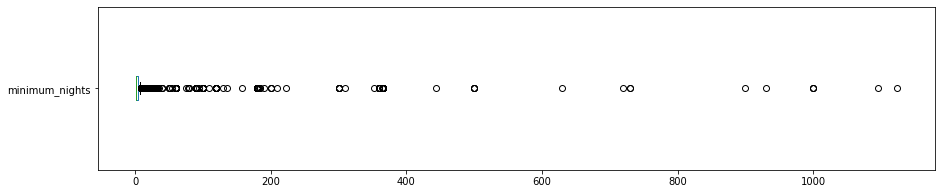


minimun_nights - valores acima de 30 dias:
221 entradas
64.3771%


In [ ]:
# boxplot para minimun_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Ver quantidade acima de 30 dias para minimun_nights
print('\nminimun_nights - valores acima de 30 dias:')
print('{} entradas'.format(len(df[df.minimum_nights >30])))
print('{:.4%}'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

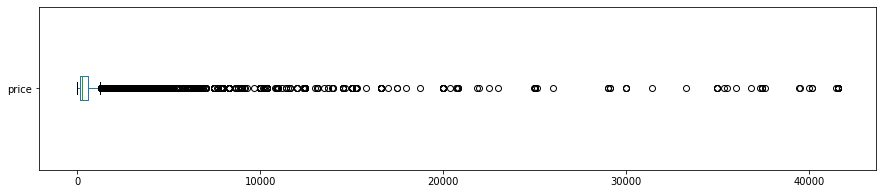


price: valores acima de 500 reais:
10082 entradas
2936.8755%


In [ ]:
# boxplot para price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

#Ver quantidade acima de 500
print('\nprice: valores acima de 500 reais:')
print('{} entradas'.format(len(df[df.price >500])))
print('{:.4%}'.format((len(df[df.price > 500]) / df.shape[0])*100))

# Limpeza de outliers - Histograma

> Outliers identificados, excluiremos as informações de calculated_host_listings_count acima de 4 imóveis por anfitrião, minimun_nights acima de 30 dias e de price acima de R$500,00 e plotaremos outro histograma para verificarmos a distribuição.



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

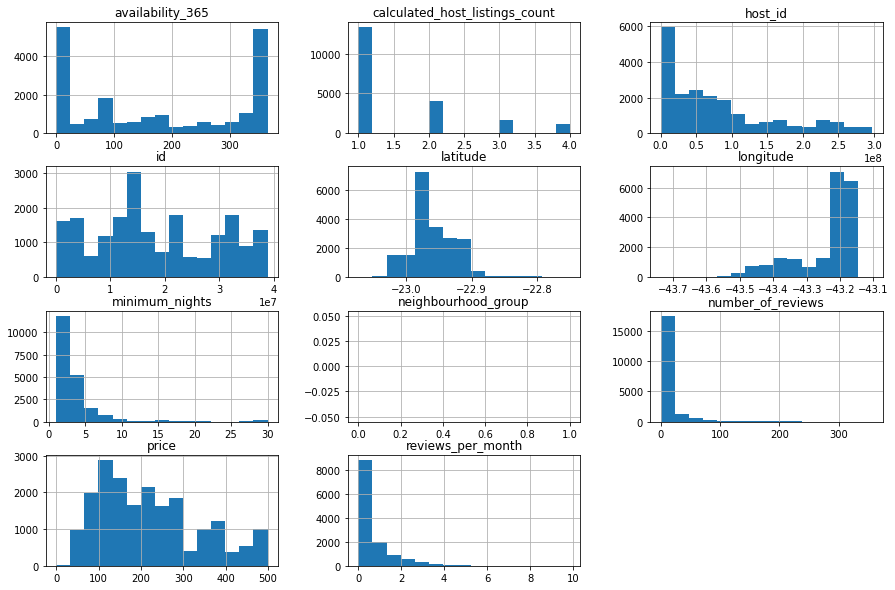

In [ ]:
#Data frame sem outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 4].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 500].index, axis = 0, inplace = True)

#Plotagem de histograma para variáveis numéricas
df_clean.hist(bins=15,figsize=(15, 10));

# Qual o tipo de imóvel mais alugado no Rio de Janeiro?

> No site Airbnb, pode-se aluguar de casa ou apartamentos, penas um quarto ou quartos compartilhados com outras pessoas. Vamos ver a quantidade de cada tipo de alugel. 



In [ ]:
#Quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    12156
Private room        7348
Shared room          487
Hotel room            96
Name: room_type, dtype: int64

In [ ]:
#Percentual de cada tipo de disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.605168
Private room       0.365809
Shared room        0.024245
Hotel room         0.004779
Name: room_type, dtype: float64

96 % dos imóveis disponíveis no rio de Janeiro são do tipo casa, apartamento e quarto privado, sendo 60% casa ou apartamento e 36% quarto privativo.

# Quais os bairros mais caros e os mais baratos do Rio de Janeiro?

> Comparação de bairros a partir do preço de locação para sabermos quais os bairros com o valor da hospedagem mais altas e mais baixas, considerando o novo Dataframe após a limpeza dos Dados.




In [ ]:
#Comparação de bairros com o preço - Localidade mais cara
print('Bairros mais carosdo RJ:')
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20]

Bairros mais carosdo RJ:


neighbourhood
Ricardo de Albuquerque      357.000000
Cavalcanti                  349.000000
Leblon                      292.173542
Higienópolis                284.200000
Rocha Miranda               280.500000
Maré                        279.000000
Barra da Tijuca             268.782759
Ipanema                     264.921411
Lagoa                       262.562189
Vasco da Gama               261.000000
Cacuia                      259.750000
Cidade Nova                 254.750000
Abolição                    252.333333
Paciência                   252.222222
Camorim                     250.484127
Recreio dos Bandeirantes    249.290068
Jacarepaguá                 247.349174
Cachambi                    246.607143
Cocotá                      246.500000
Joá                         245.727273
Name: price, dtype: float64

In [ ]:
#Comparação de bairros com o preço - Localidade mais barata
print('Bairros mais baratos do RJ:')
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:20]

Bairros mais baratos do RJ:


neighbourhood
Coelho Neto             42.000000
Complexo do Alemão      42.000000
Vista Alegre            79.000000
Vila Militar            79.000000
Colégio                 79.000000
Galeão                  79.800000
Vigário Geral           83.000000
Manguinhos              87.000000
Vila Kosmos             89.000000
Gericinó                89.500000
Senador Vasconcelos     97.000000
Parada de Lucas         97.833333
Realengo                99.285714
Penha                  103.705882
Bonsucesso             106.400000
Pavuna                 108.333333
Cordovil               111.500000
Padre Miguel           112.400000
Jacarezinho            121.000000
Cosmos                 123.714286
Name: price, dtype: float64

Conseguimos comparar os valores de hospegagem mais caros e mais baratos e também os bairros.

> Com as coordenadas de latitude e longitude fornecidas pelos imóveis é possivel plotar cada ponto. Considerando x=Longitude e y=Latitude.



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

(<matplotlib.axes._subplots.AxesSubplot at 0x7f122e024dd8>,)

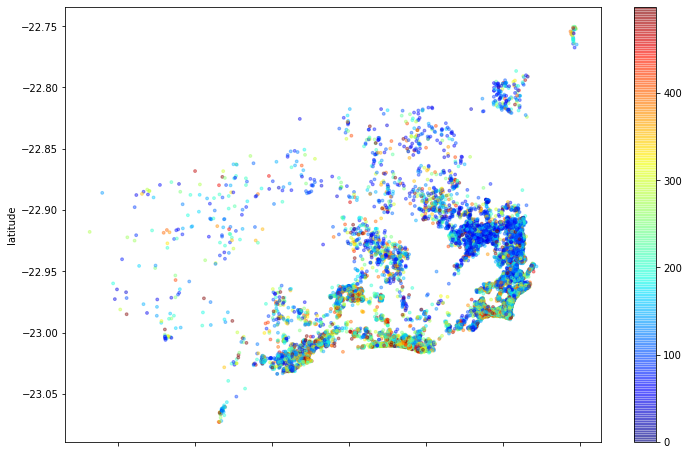

In [ ]:
#Plotar os imóveis pelas suas coordenadas de latutude e longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12, 8)),

Plotando o mapa de coordenadas podemos visualizar que a maior concentração de imíveis para aluguel do site Airbnb na cidade do Rio de Janeiro esta concentrada perto das prias cariocas(pontos amarelos e vermelhos), os pontos azuis indicam presença de outliers e valores discrepantes.

## **Conclusão**

> Este Dataset é uma versão resumida, apenas para uma abordagem incicial de quem como eu esta iniciando seu aprendizado em Data Science, estando aberto a correções, dicas e opiniões de quem já tem experiencia.
Foi realizado uma análise superficial, excluindo -se alguns outliers referentes a algumas variáveis, melhorando o dataFrame possibilitando extrair algumas informações de importancia como, tipo de imóvel por bairro, por preço, maior valor por bairro, menor valor por bairro, imóveis com maior disponibilidade, e localização.
> Com essa análise dos Dados do Airbnb da cidade do Rio de Janeiro é possivel perceber a importancia da limpeza dos Dados, pois a presença de outliers distorcem o resultado final.



